In [1]:
from sklearn.decomposition import PCA
from sklearn.datasets import load_digits
from matplotlib import pyplot as plt
import numpy as np

digits = load_digits()
print("손글씨 이미지의 크기는",digits.data.shape[1],"픽셀 입니다.")

손글씨 이미지의 크기는 64 픽셀 입니다.


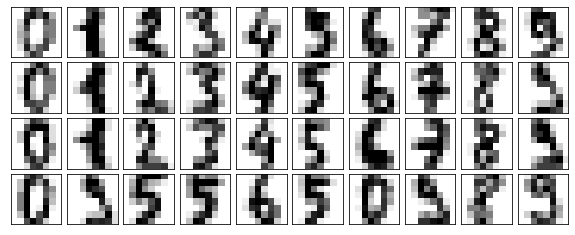

In [2]:
import matplotlib.pyplot as plt

def plot_digits(data):
    fig, axes = plt.subplots(4, 10, figsize=(10, 4),
                             subplot_kw={'xticks':[], 'yticks':[]},
                             gridspec_kw=dict(hspace=0.1, wspace=0.1))
    for i, ax in enumerate(axes.flat):
        ax.imshow(data[i].reshape(8, 8),
                  cmap='binary', interpolation='nearest',
                  clim=(0, 16))
plot_digits(digits.data) # 원본 손글씨 이미지 출력

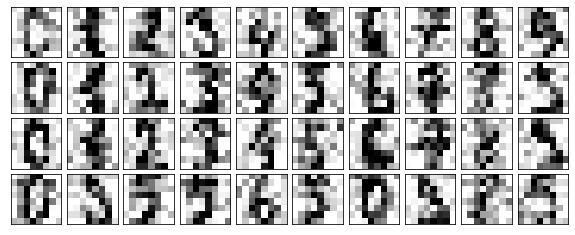

In [3]:
np.random.seed(42)
noisy = np.random.normal(digits.data, 4)
plot_digits(noisy) # 잡음이 섞인 손글씨 이미지 출력

In [4]:
pca = PCA(0.50).fit(noisy) #데이터의 50% 수준(분산 기준)를 표현할 수 있는PCA 기저벡터의 수는?
print("데이터의 50% 수준(분산 기준)까지 복원 가능한 PCA 기저벡터의 수는",pca.n_components_,"개 입니다")

데이터의 50% 수준(분산 기준)까지 복원 가능한 PCA 기저벡터의 수는 12 개 입니다


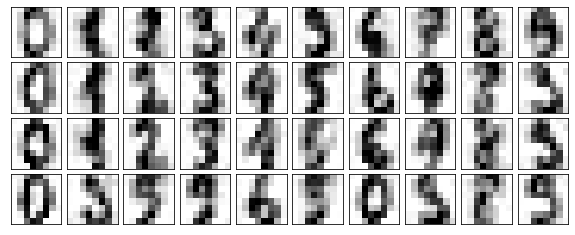

In [5]:
components = pca.transform(noisy)
filtered = pca.inverse_transform(components)
plot_digits(filtered) # 복원된 손글씨 이미지

In [7]:
from sklearn.decomposition import PCA
from sklearn.datasets import load_digits

digits = load_digits()
print("손글씨 이미지의 크기는",digits.data.shape[1],"픽셀 입니다.")

손글씨 이미지의 크기는 64 픽셀 입니다.


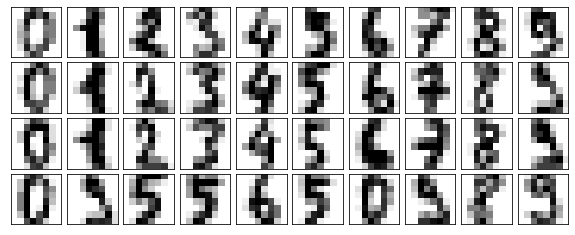

In [8]:
def plot_digits(data):
    fig, axes = plt.subplots(4, 10, figsize=(10, 4),
                             subplot_kw={'xticks':[], 'yticks':[]},
                             gridspec_kw=dict(hspace=0.1, wspace=0.1))
    for i, ax in enumerate(axes.flat):
        ax.imshow(data[i].reshape(8, 8),
                  cmap='binary', interpolation='nearest',
                  clim=(0, 16))
plot_digits(digits.data) # 원본 이미지 출력

In [9]:
pca = PCA(0.90).fit(digits.data) #데이터의 90% 수준까지 복원 가능한 PCA 기저벡터의 수는?
print("데이터의 90% 수준까지 복원 가능한 PCA 기저벡터의 수는",pca.n_components_,"개 입니다")

데이터의 90% 수준까지 복원 가능한 PCA 기저벡터의 수는 21 개 입니다


In [10]:
compression_ratio=(digits.data.shape[1]-pca.n_components_)/digits.data.shape[1]*100
print("압축률은",compression_ratio,"% 입니다.")

압축률은 67.1875 % 입니다.


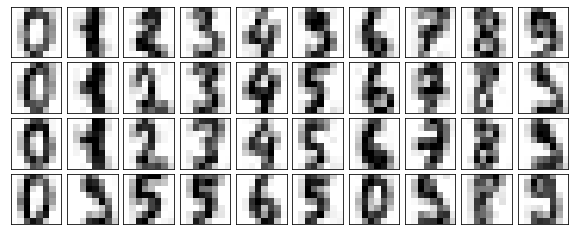

In [11]:
components = pca.transform(digits.data)
filtered = pca.inverse_transform(components)
plot_digits(filtered) #복원된 이미지